# Get data from Copernicus Climate Data Store

In [159]:
#pip install netcdf4
#pip install netCDF4

In [169]:
import cdsapi
import netCDF4
import xarray as xr
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
if 0:  
  c = cdsapi.Client()

  dataset = 'reanalysis-era5-pressure-levels'

  request = {
        'product_type': ['reanalysis'],
        'variable': ['geopotential'],
        'year': ['2024'],
        'month': ['03'],
        'day': ['01'],
        'time': ['13:00'],
        'pressure_level': ['1000'],
        'data_format': 'netcdf',
    }
  target = 'download.nc'

  c.retrieve(dataset, request, target)

2024-11-18 15:07:14,954 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-11-18 15:07:14,957 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-11-18 15:07:14,962 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-11-18 15:07:14,964 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using t

c3ae23dd527d9a8eeef73749e464332a.nc:   0%|          | 0.00/1.52M [00:00<?, ?B/s]

In [ ]:
# Open the NetCDF file
dataset = Dataset('download.nc')

In [156]:
print(dataset)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2024-11-07T03:28 GRIB to CDM+CF via cfgrib-0.9.14.1/ecCodes-2.36.0 with {"source": "data.grib", "filter_by_keys": {"stream": ["oper"]}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): valid_time(1), pressure_level(1), latitude(721), longitude(1440)
    variables(dimensions): int64 number(), int64 valid_time(valid_time), float64 pressure_level(pressure_level), float64 latitude(latitude), float64 longitude(longitude), <class 'str'> expver(), float32 z(valid_time, pressure_level, latitude, longitude)
    groups: 


In [162]:
print(dataset.variables.keys())

dict_keys(['number', 'valid_time', 'pressure_level', 'latitude', 'longitude', 'expver', 'z'])


In [203]:
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]
time = dataset.variables['valid_time'][:]
z = dataset.variables['z'][:]

In [209]:
print(f'The smallest latitude is {lats.min()} and the largest latitude is {lats.max()}')
print(f'Then length of the latitude array is {len(lats)}')

print(f'The smallest longitude is {lons.min()} and the largest longitude is {lons.max()}')
print(f'Then length of the longitude array is {len(lons)}')

print(f'The smallest z is {z.min()} and the largest z is {z.max()}')
print(f'The shape of the z array is {z.shape}')

The smallest latitude is -90.0 and the largest latitude is 90.0
Then length of the latitude array is 721
The smallest longitude is 0.0 and the largest longitude is 359.75
Then length of the longitude array is 1440
The smallest z is -4286.60546875 and the largest z is 3106.39453125
The shape of the z array is (1, 1, 721, 1440)


In [202]:
z = dataset.variables['z'][:]
print(z.shape)
number = dataset.variables['number'][:]
p = dataset.variables['pressure_level'][:]
p.shape
expver = dataset.variables['expver'][:]
expver


(1, 1, 721, 1440)


'0001'

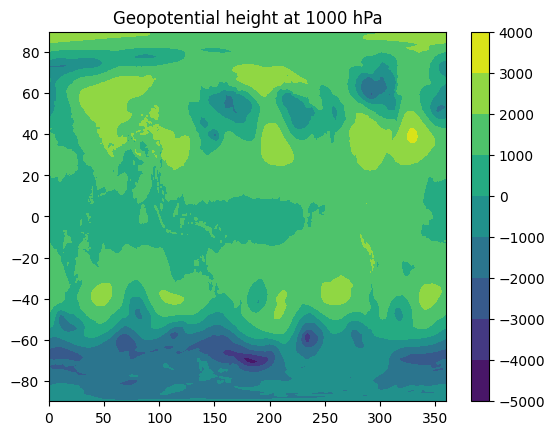

In [216]:
# Plot
lon, lat = np.meshgrid(lons, lats)

plt.contourf(lon, lat, z[0,0,:,:])
plt.title('Geopotential height at 1000 hPa')
plt.colorbar()
plt.show()

# Load climate data from grib file

In [118]:
import xarray as xr
import numpy as np


In [ ]:
#pip install eccodes --no-binary eccodes


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip show eccodes

Name: eccodes
Version: 1.2.0
Summary: Python interface to the ecCodes GRIB and BUFR decoder/encoder
Home-page: https://github.com/ecmwf/eccodes-python
Author: European Centre for Medium-Range Weather Forecasts (ECMWF)
Author-email: software.support@ecmwf.int
License: Apache License Version 2.0
Location: c:\Users\Matteo\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: attrs, cffi, numpy
Required-by: cfgrib
Note: you may need to restart the kernel to use updated packages.


In [138]:
#import cfgrib


In [ ]:
#data = cfgrib.open_datasets('download.grib')

NameError: name 'cfgrib' is not defined